In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from matplotlib import rcParams
from mplsoccer import FontManager
import numpy as np
import pandas as pd
import urllib
import os

In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [5]:
df = pd.read_csv('D:/stats project/finaldata_csv (for viz)/passing.csv', encoding = "utf-8")

In [6]:
player = ['William Saliba', 'João Cancelo', 'Aymeric Laporte', 'Joshua Kimmich',
       'Presnel Kimpembe', 'Toni Kroos', 'Trent Alexander-Arnold',
       'Marco Verratti', 'Nayef Aguerd', 'Declan Rice', 'Manuel Akanji',
       'Aurélien Tchouaméni', 'Éder Militão',
       'Lucas Hernández', 'Joško Gvardiol', 'Cheick Doucouré',
       'Duje Ćaleta-Car', 'Rúben Neves', 'João Moutinho', 'James Ward-Prowse','Luis Alberto']

In [7]:
df_main = df[~df["Player"].isin(player)].reset_index(drop = True)
df_highlight = df[df["Player"].isin(player)].reset_index(drop = True)

In [4]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [12]:
np.random.seed(120)
x_loc = np.random.uniform(0.1,.9,10)
y_loc = np.random.uniform(0.1,.9,10)

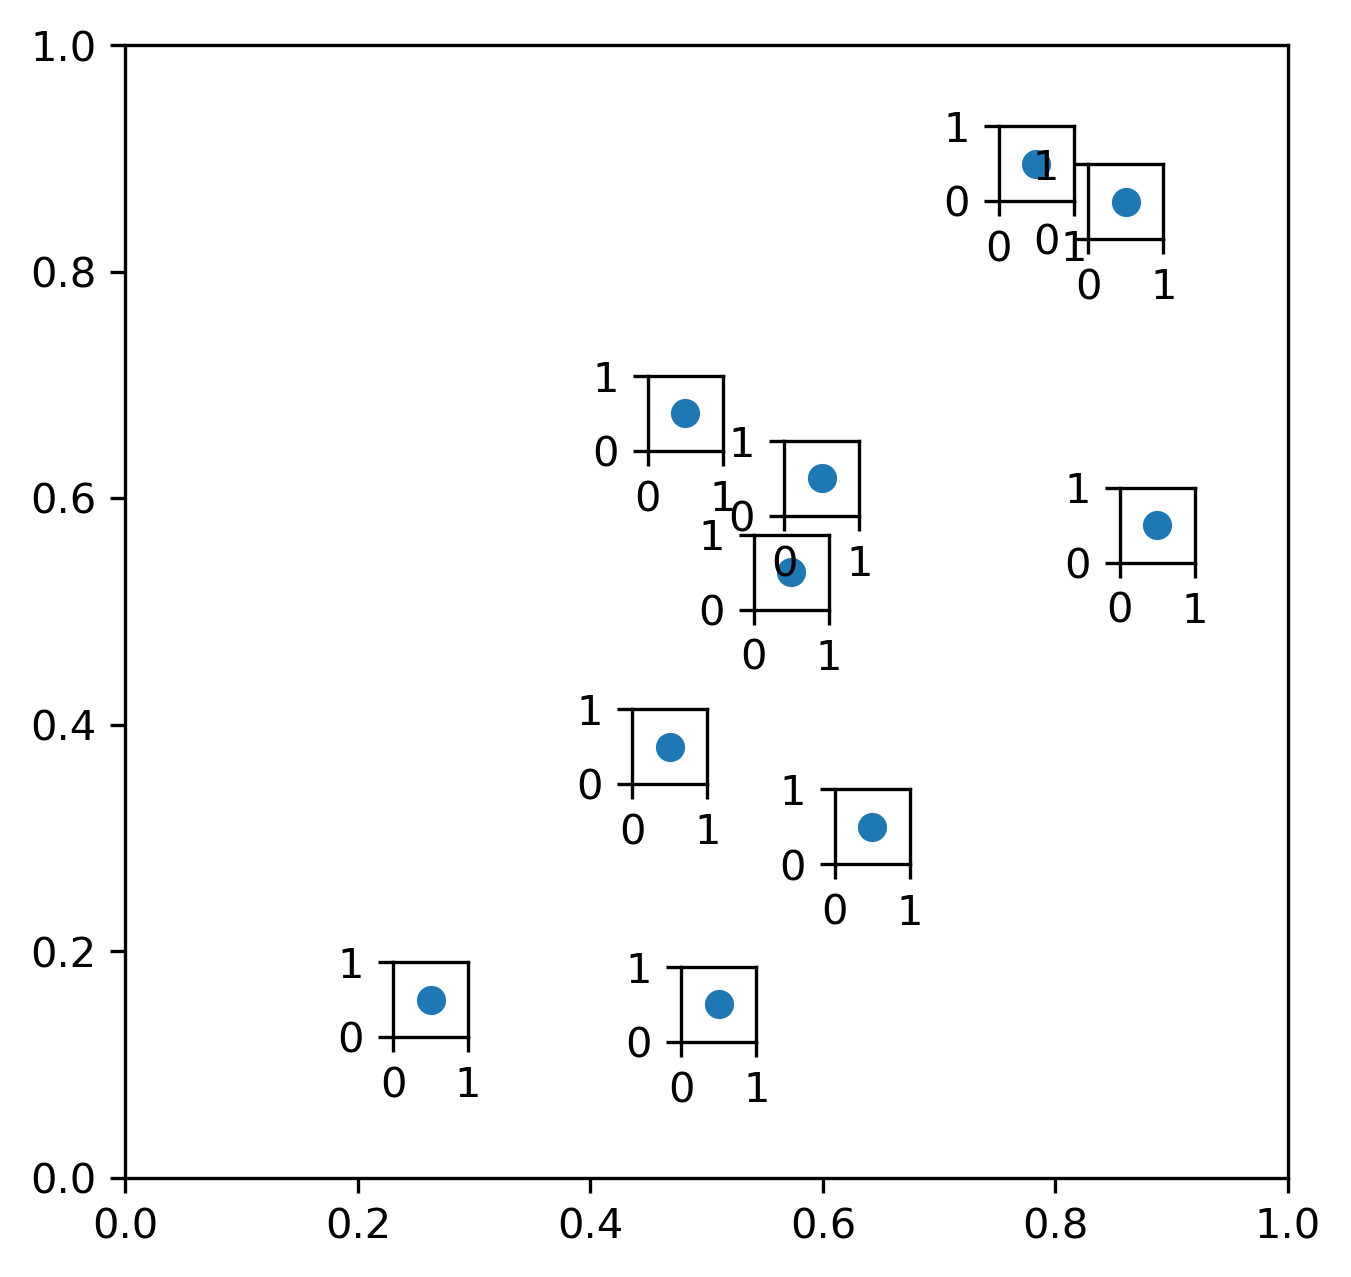

In [9]:
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()

ax.set_xlim(0,1)
ax.set_ylim(0,1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )

ax.scatter(x_loc, y_loc, zorder=3)

In [6]:
clubs = [
    4616,
    210173,
    8044,
    9991,
    9860,
    8003,
    8695,
    8654,
    9731,
    10154
]

In [31]:
fig = plt.figure(facecolor = "#f2f2f2",figsize = (7,5), dpi = 300)
ax = plt.subplot(facecolor = "#e6f2ff")

ax.set_xlim(0,10)
ax.set_ylim(0,10)
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    df_main["pp90"], 
    df_main["Cmp%"], 
    s = 40, 
    alpha = 0.75, 
    color = "#a6a6a6",
    zorder = 3
)

ax.scatter(
    df_highlight["pp90"], 
    df_highlight["Cmp%"], 
    s = 40, 
    alpha = 0.95, 
    color = "#e6f2ff",
    zorder = 3,
    #ec = "#000000",
)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

for x,y in zip(df_highlight["pp90"], df_highlight["Cmp%"],):
    ax_coords = DC_to_NFC((x,y))
    fig.add_axes(
        [ax_coords[0]-0.2, ax_coords[1]-0.15, ax_size, ax_size],
         fc='None'
    )


df_highlight['path'] = df_highlight['Squad'] + '.PNG'
def getImage(path):
    return OffsetImage(plt.imread('D:/stats project/team_logos/' + path), zoom=.05, alpha = 1)

for index, row in df_highlight.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['pp90'], row['Cmp%']), frameon=False)
    ax.add_artist(ab)

ax.plot(
    [df["pp90"].median(), df["pp90"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [df["Cmp%"].median(), df["Cmp%"].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.grid(True, ls = ":", color = "lightgray")

for index, name in enumerate(df_highlight["Player"]):
    X = df_highlight["pp90"].iloc[index]
    Y = df_highlight["Cmp%"].iloc[index]
    y_pos = -9
    x_pos = 0
    text_ = ax.annotate(
        xy = (X, Y),
        text = name.split()[1],
        ha = "center",
        va = "center",
        fontsize = 6,
        xytext = (x_pos, y_pos),
        textcoords = "offset points",
        weight = "bold"
    )

    text_.set_path_effects(
                [path_effects.Stroke(linewidth=2.5, foreground="white"), 
                path_effects.Normal()]
            )


ax.set_xlabel("Successfull passes (per 90 mins)")
ax.set_ylabel("Pass Completion Rate (in %)")

fig_text(
    x = 0.91, y = 1.0, 
    s = "Player Passing | Big 5 European Leagues | 2021/22 Season",
    va = "bottom", ha = "right",
    fontsize = 15, color = "#003399", fontproperties = font_bold.prop
)

fig_text(
	x = 0.89, y = 0.92, 
    s = "Minimum 1710 mins or 19x 90-mins played (equivalent to half a season playing time) | The top right quadrant\nrepresents High Volume - High Accuracy | The bottom left quadrant represents Low Volume - Low Accuracy",
	va = "bottom", ha = "right",
	fontsize = 8, color = "#4d4d4d",fontproperties = font_italic.prop
)

fig_text(
    x = 0.96, y = 0.03,
    s = 'Data from fbref.com\nCreated by @imnotankur',
    va = "bottom", ha = 'right',
    fontsize = 6, color = "#4d4d4d", fontproperties = font_italic.prop
)